#### PIZZA RESTAURANT SALES 

This pizza sales dataset make up 12 relevant features:

     
1- Order_id: Unique identifier for each order placed by a table
     
2- Order_details_id: Unique identifier for each pizza placed within each order (pizzas of the same type and size are kept in the same row, and the quantity increases)
     
3- Pizza_id: Unique key identifier that ties the pizza ordered to its details, like size and price
     
4- Quantity: Quantity ordered for each pizza of the same type and size
     
5- Order_date: Date the order was placed (entered into the system prior to cooking & serving)
     
6- Order_time: Time the order was placed (entered into the system prior to cooking & serving)
     
7- Unit_price: Price of the pizza in USD
     
8- Total_price: unit_price * quantity
     
9- Pizza_size: Size of the pizza (Small, Medium, Large, X Large, or XX Large)
     
10- Pizza_type: Unique key identifier that ties the pizza ordered to its details, like size and price
     
11- Pizza_ingredients: ingredients used in the pizza as shown in the menu (they all include Mozzarella Cheese, even if not specified; and they all include Tomato Sauce, unless another sauce is specified)
     
12- Pizza_name: Name of the pizza as shown in the menu
 

Here are some questions that we'd like to be able to answer:

1. What days and times do we tend to be busiest?
2. How many pizzas are we making during peak periods?
3. What are our best and worst-selling pizzas?
4. What's our average order value?
5. How well are we utilizing our seating capacity? (we have 15 tables and 60 seats)

##### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Loading Dataset


In [2]:
df = pd.read_excel('pizza_sales.xlsx')
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


### Exploratory Some Information About Dataset


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


In [3]:
df.describe()

,order_details_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [4]:
df.shape

(48620, 12)

In [5]:
df.isna().sum()

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [6]:
df.columns

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

#### Change the hour object into integer  

In [9]:
clean = df.copy()
clean

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [10]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


In [12]:
df['Hour'] = df['order_time']
for i in range (len(df)):
    df['Hour'].iloc[i] = df['order_time'].values[i].hour

C:\Users\hh\AppData\Local\Temp\ipykernel_9268\774960424.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour'].iloc[i] = df['order_time'].values[i].hour


In [13]:
x=df.Hour.value_counts()
x

12    6543
13    6203
18    5359
17    5143
19    4350
16    4185
14    3521
20    3487
15    3170
11    2672
21    2528
22    1370
23      68
10      17
9        4
Name: Hour, dtype: int64

### Data Visualization


In [14]:
convert = ["quantity"]
for col in convert:
    df[col] = df[col].astype("float64")
df.head()    

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,Hour
0,1,1,hawaiian_m,1.0,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,11
1,2,2,classic_dlx_m,1.0,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,11
2,3,2,five_cheese_l,1.0,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,11
3,4,2,ital_supr_l,1.0,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,11
4,5,2,mexicana_m,1.0,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,11


### Q1. Plot the graph between hour and sales

In [15]:
df['frequency'] = (df['quantity']*df['total_price'])/2
df['frequency']

0         6.625
1         8.000
2         9.250
3        10.375
4         8.000
          ...  
48615     8.375
48616     8.975
48617     6.000
48618    10.125
48619     6.375
Name: frequency, Length: 48620, dtype: float64

In [16]:
results = df.groupby(by='Hour',as_index=False)['frequency'].sum()
x = results.sort_values(by = 'frequency',ascending=False)
x

,Hour,frequency
3,12,59969.350
4,13,56695.850
9,18,45623.075
8,17,44228.075
10,19,37277.850
7,16,35953.700
5,14,31247.400
11,20,29902.350
6,15,27257.150
2,11,23424.900


Text(0.5, 1.0, 'HOUR')

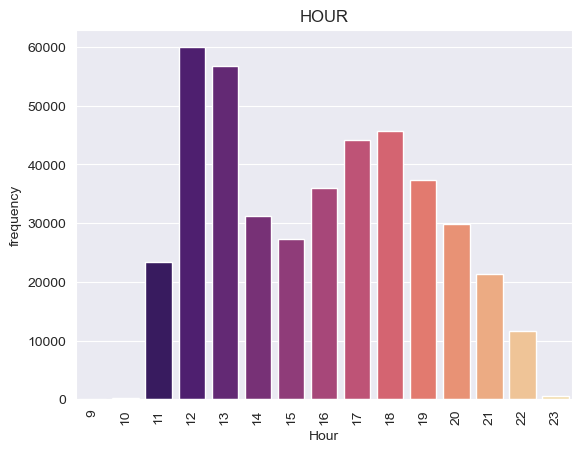

In [17]:
sns.set_style('darkgrid')
sns.barplot(x='Hour', y = 'frequency', data = x,  palette = 'magma' , color='magma')
plt.xticks(rotation=90)
plt.title('HOUR')

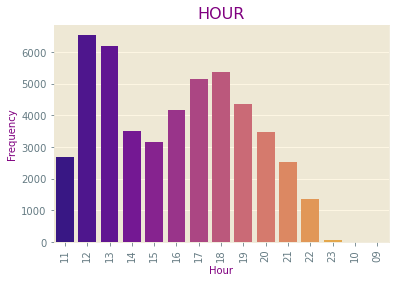

### Q2. Find the total order in a year

In [18]:
df['order_year'] = df['order_date'].dt.year
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,Hour,frequency,order_year
0,1,1,hawaiian_m,1.0,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,11,6.625,2015
1,2,2,classic_dlx_m,1.0,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,11,8.000,2015
2,3,2,five_cheese_l,1.0,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,11,9.250,2015
3,4,2,ital_supr_l,1.0,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,11,10.375,2015
4,5,2,mexicana_m,1.0,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,11,8.000,2015


In [19]:
df.order_year.value_counts()

2015    48620
Name: order_year, dtype: int64

# **Total order placed in a year is 48620**

### Q3. Find The day-wise sales

In [20]:
df['order_dates'] = df['order_date'].dt.day_name()
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,Hour,frequency,order_year,order_dates
0,1,1,hawaiian_m,1.0,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,11,6.625,2015,Thursday
1,2,2,classic_dlx_m,1.0,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,11,8.000,2015,Thursday
2,3,2,five_cheese_l,1.0,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,11,9.250,2015,Thursday
3,4,2,ital_supr_l,1.0,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,11,10.375,2015,Thursday
4,5,2,mexicana_m,1.0,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,11,8.000,2015,Thursday


In [21]:
df.order_dates.value_counts()


Friday       8106
Saturday     7355
Thursday     7323
Wednesday    6797
Tuesday      6753
Monday       6369
Sunday       5917
Name: order_dates, dtype: int64

# Plot the graph for day_wise sales

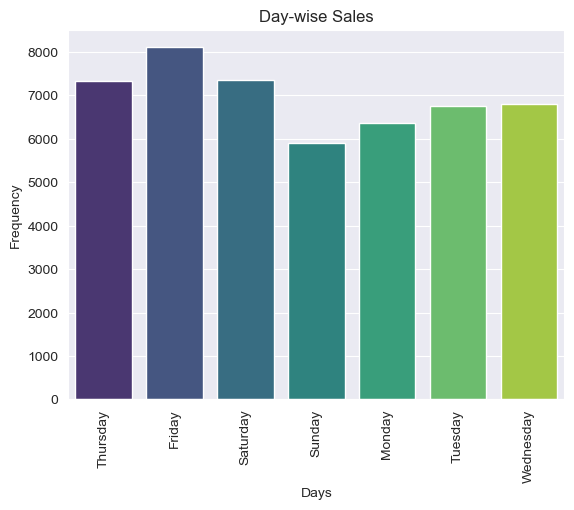

In [22]:
sns.set_style('darkgrid')
sns.countplot(x="order_dates", data=df, palette="viridis")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.title("Day-wise Sales")
plt.show()

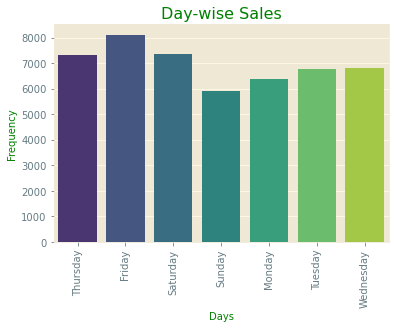

In [13]:
palette="viridis"

### Q4. Find Monthly sales

In [23]:
df['order_month'] = df['order_date'].dt.month_name()
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,Hour,frequency,order_year,order_dates,order_month
0,1,1,hawaiian_m,1.0,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,11,6.625,2015,Thursday,January
1,2,2,classic_dlx_m,1.0,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,11,8.000,2015,Thursday,January
2,3,2,five_cheese_l,1.0,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,11,9.250,2015,Thursday,January
3,4,2,ital_supr_l,1.0,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,11,10.375,2015,Thursday,January
4,5,2,mexicana_m,1.0,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,11,8.000,2015,Thursday,January


In [24]:
df.order_month.value_counts()

July         4301
May          4239
March        4186
November     4185
January      4156
August       4094
April        4067
June         4025
February     3892
December     3859
September    3819
October      3797
Name: order_month, dtype: int64

### Plot graph for monthly sales

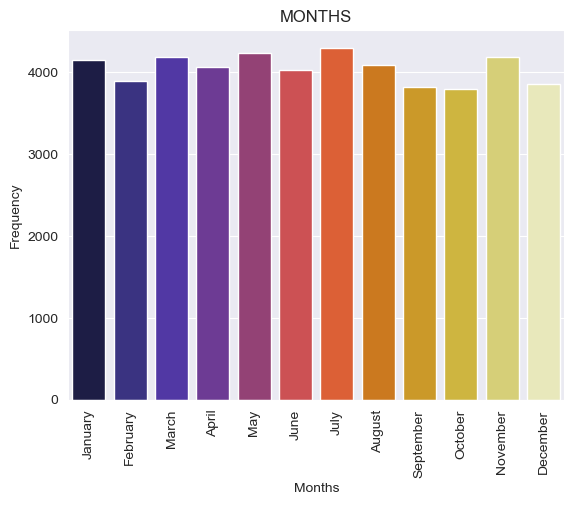

In [25]:
sns.set_style('darkgrid')
sns.countplot(x="order_month", data=df, palette="CMRmap")
plt.xlabel("Months")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.title("MONTHS")
plt.show()

In [24]:
palette="CMRmap"

#### Find which pizza has highest sales

In [26]:
df.pizza_id.value_counts()

big_meat_s        1811
thai_ckn_l        1365
five_cheese_l     1359
four_cheese_l     1273
classic_dlx_m     1159
                  ... 
mexicana_s         160
calabrese_s         99
ckn_alfredo_s       96
green_garden_l      94
the_greek_xxl       28
Name: pizza_id, Length: 91, dtype: int64

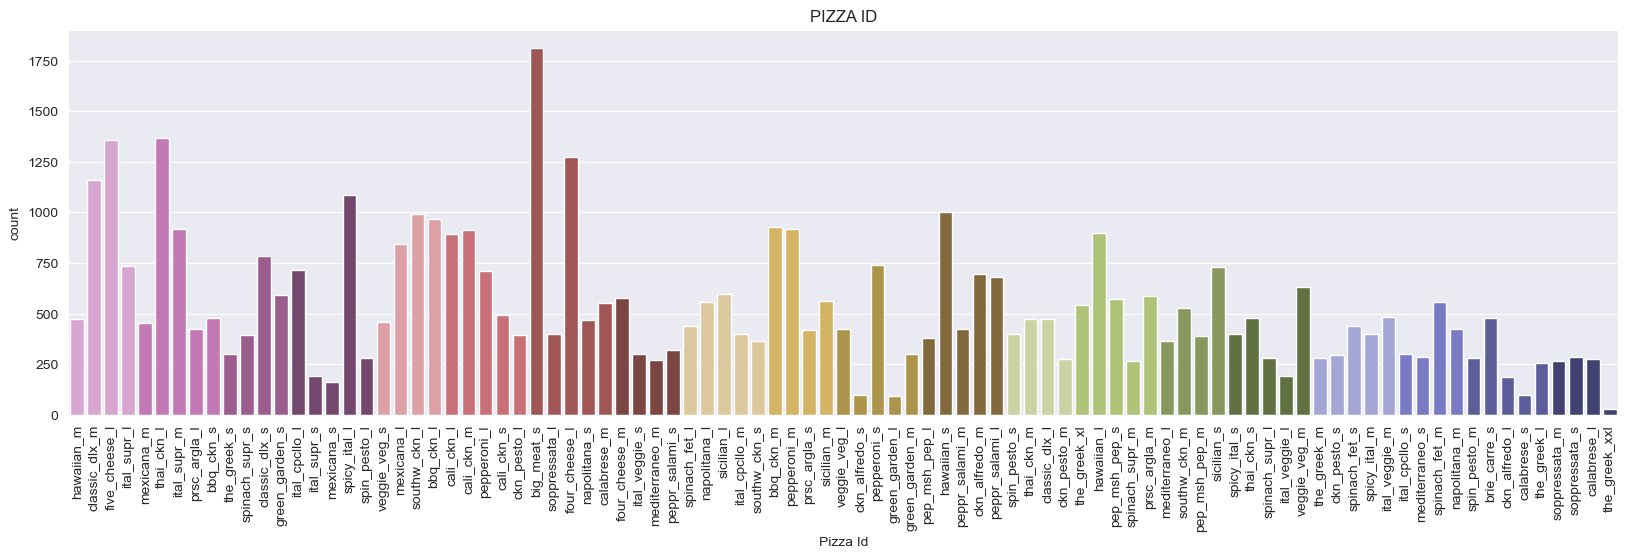

In [27]:
sns.set_style('darkgrid')
plt.figure(figsize=(20,5))
sns.countplot(x="pizza_id", data=df, palette="tab20b_r")
plt.xlabel("Pizza Id")
plt.ylabel("count")
plt.xticks(rotation=90)
plt.title("PIZZA ID")
plt.show()

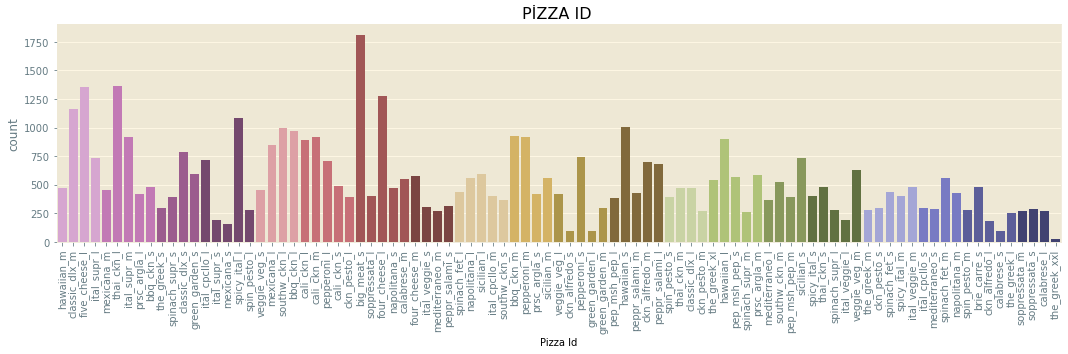

In [17]:
palette="tab20b_r"

# **Big_meat_s has highest sale**

#### How much quantity of pizzas ordered more.

In [28]:
df.quantity.value_counts()

1.0    47693
2.0      903
3.0       21
4.0        3
Name: quantity, dtype: int64

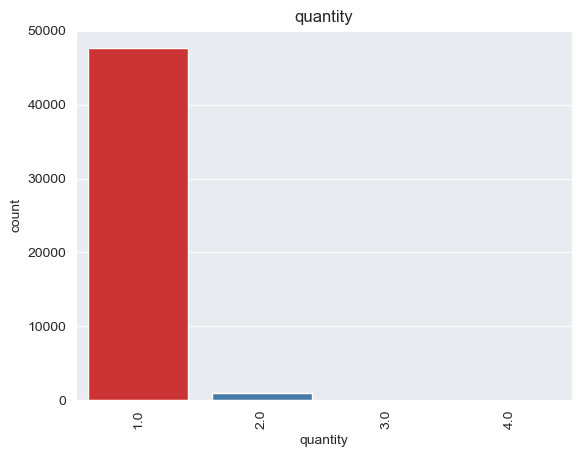

In [29]:
sns.set_style('darkgrid')
sns.countplot(x="quantity", data=df, palette="Set1")
plt.xlabel("quantity")
plt.ylabel("count")
plt.xticks(rotation=90)
plt.title("quantity")
plt.show()

# **1 Quantity of pizza is ordered more.**

In [29]:
palette="Set1"

### Which pizza size sales has less in number

In [30]:
df.pizza_size.value_counts(ascending=True)

XXL       28
XL       544
S      14137
M      15385
L      18526
Name: pizza_size, dtype: int64

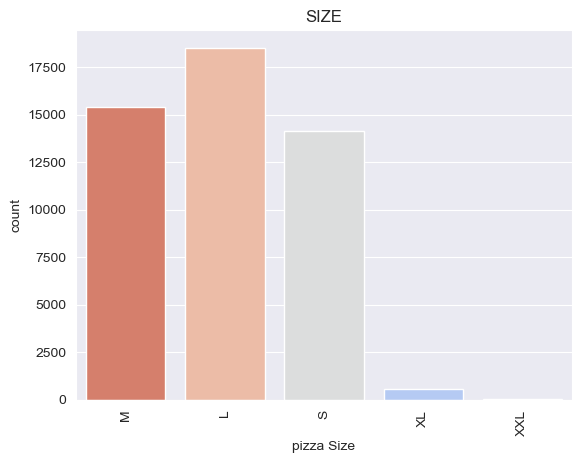

In [31]:
sns.set_style('darkgrid')
sns.countplot(x="pizza_size", data=df, palette="coolwarm_r")
plt.xlabel("pizza Size")
plt.ylabel("count")
plt.xticks(rotation=90)
plt.title("SIZE")
plt.show()

# **XXL have least sale**

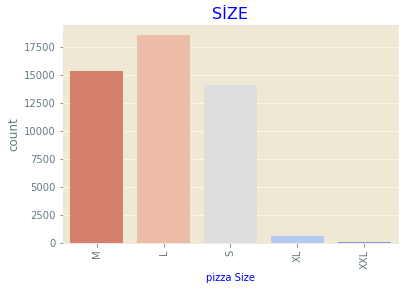

In [21]:
palette="coolwarm_r"

### Plot the piechart with percentage sales of pizza size

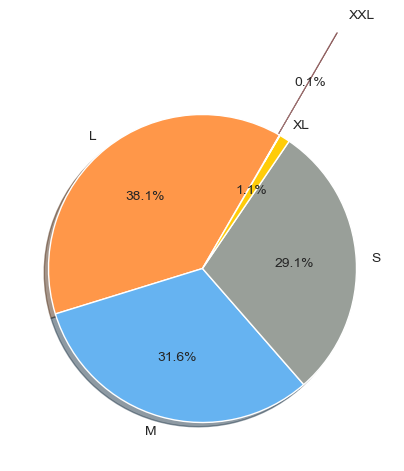

In [32]:
plt.figure(figsize=(5,5))
data=df.pizza_size.value_counts()
labels =['L','M','S','XL','XXL']
colors = ['#ff9749','#66b3f1','#999f99','#ffcc09',"RED","cyan"]
explodeTuple = [0.0,0.0,0.0,0.0,0.8]
plt.pie(data, labels=labels, colors=colors, explode=explodeTuple, shadow=True, autopct='%1.1f%%',startangle=60)
plt.show()

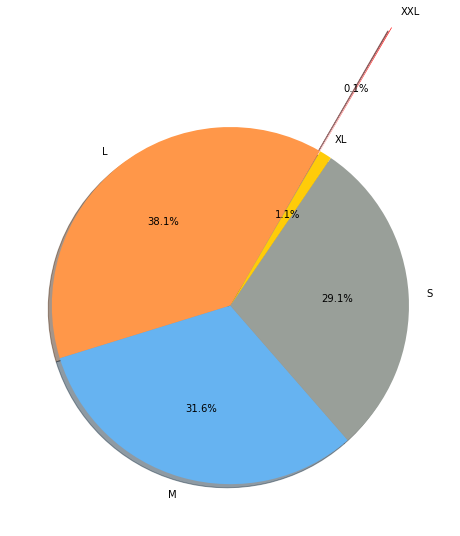

In [22]:
colors = ['#ff9749','#66b3f1','#999f99','#ffcc09',"RED","cyan"]

### Find which category of pizza ordered most

In [33]:
df.pizza_category.value_counts()

Classic    14579
Supreme    11777
Veggie     11449
Chicken    10815
Name: pizza_category, dtype: int64

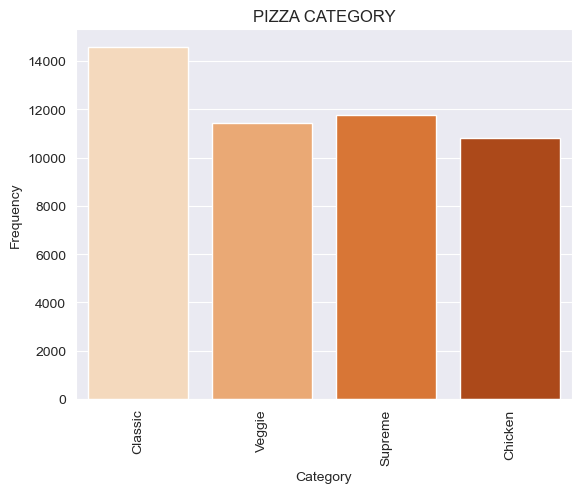

In [34]:
sns.set_style('darkgrid')
sns.countplot(x="pizza_category", data=df, palette="Oranges")
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.title("PIZZA CATEGORY")
plt.show()

# **Classic category of pizza is ordered most.**

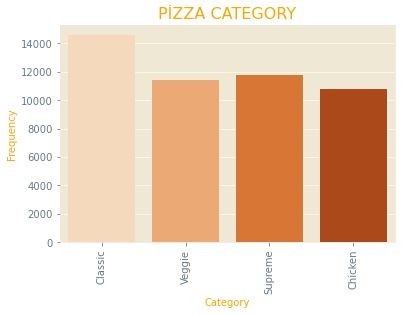

In [24]:
palette="Oranges"

#### Plot the piechart which shows the percentage of sales

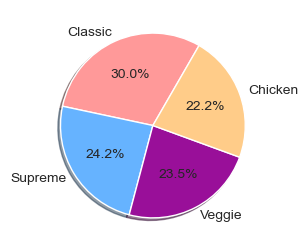

In [35]:
plt.figure(figsize=(3,3))
data=df.pizza_category.value_counts()
labels =['Classic','Supreme','Veggie','Chicken']
colors = ['#ff9999','#66b3ff','#990f99','#ffcc89',"pink","yellow"]
plt.pie(data, labels=labels, colors=colors, shadow=True, autopct='%1.1f%%',startangle=60)
plt.show()

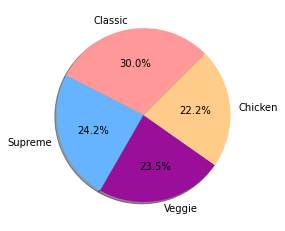

In [25]:
colors = ['#ff9999','#66b3ff','#990f99','#ffcc89',"pink","yellow"]

### Get the value counts for pizza ingredients

In [36]:
df.pizza_ingredients.value_counts()

Pepperoni, Mushrooms, Red Onions, Red Peppers, Bacon                                                 2416
Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce                  2372
Sliced Ham, Pineapple, Mozzarella Cheese                                                             2370
Mozzarella Cheese, Pepperoni                                                                         2369
Chicken, Pineapple, Tomatoes, Red Peppers, Thai Sweet Chilli Sauce                                   2315
Chicken, Artichoke, Spinach, Garlic, Jalapeno Peppers, Fontina Cheese, Gouda Cheese                  2302
Coarse Sicilian Salami, Tomatoes, Green Olives, Luganega Sausage, Onions, Garlic                     1887
Capocollo, Tomatoes, Goat Cheese, Artichokes, Peperoncini verdi, Garlic                              1887
Chicken, Tomatoes, Red Peppers, Red Onions, Jalapeno Peppers, Corn, Cilantro, Chipotle Sauce         1885
Ricotta Cheese, Gorgonzola Piccante Cheese, Mo

**Find Total Money Earned From Pizza Categories and also plot pie chart**

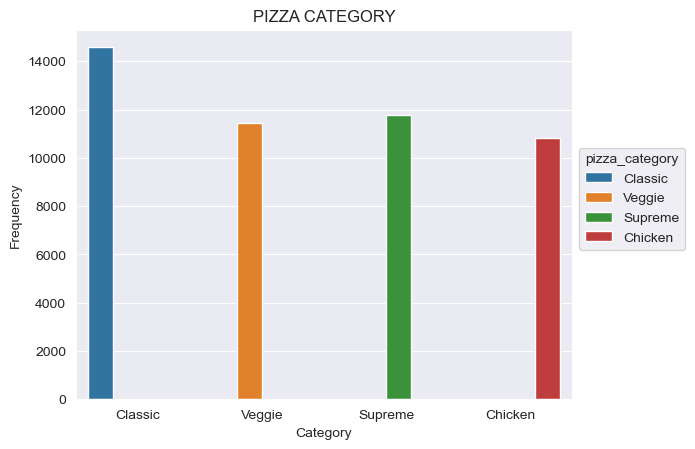

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


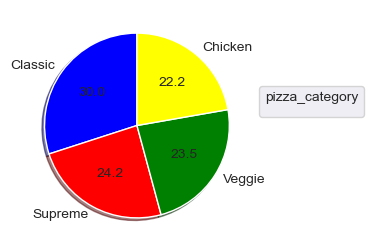

In [85]:
sns.set_style('darkgrid')
sns.countplot(x="pizza_category", hue="pizza_category",  data=df)
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.legend(title="pizza_category",fontsize=10, bbox_to_anchor=(1,0.7))
plt.title("PIZZA CATEGORY")
plt.show()

plt.figure(figsize=(3,3))
data=df.pizza_category.value_counts()
plt.legend(title="pizza_category",fontsize=10, bbox_to_anchor=(1,0.7))
labels =['Classic','Supreme','Veggie','Chicken']
plt.pie(data, labels=labels,  colors=colors, shadow=True, autopct='%1.1f',startangle=90)
plt.show()

**Day-wise orders placed in every month**

In [41]:
df.order_dates.value_counts()

Friday       8106
Saturday     7355
Thursday     7323
Wednesday    6797
Tuesday      6753
Monday       6369
Sunday       5917
Name: order_dates, dtype: int64

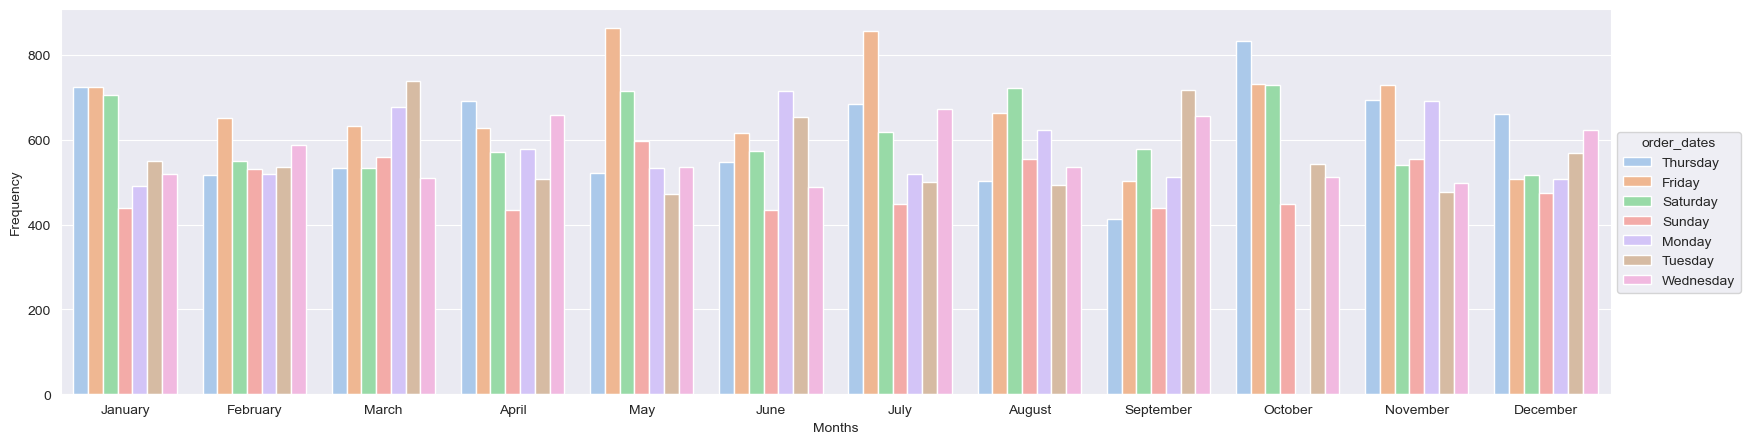

In [58]:
plt.figure(figsize=(20,5))
sns.countplot(x="order_month", hue="order_dates", palette="pastel", data=df)
plt.xlabel("Months")
plt.ylabel("Frequency")
plt.legend(title = 'order_dates',fontsize=10,bbox_to_anchor=(1,0.7))
plt.show()      

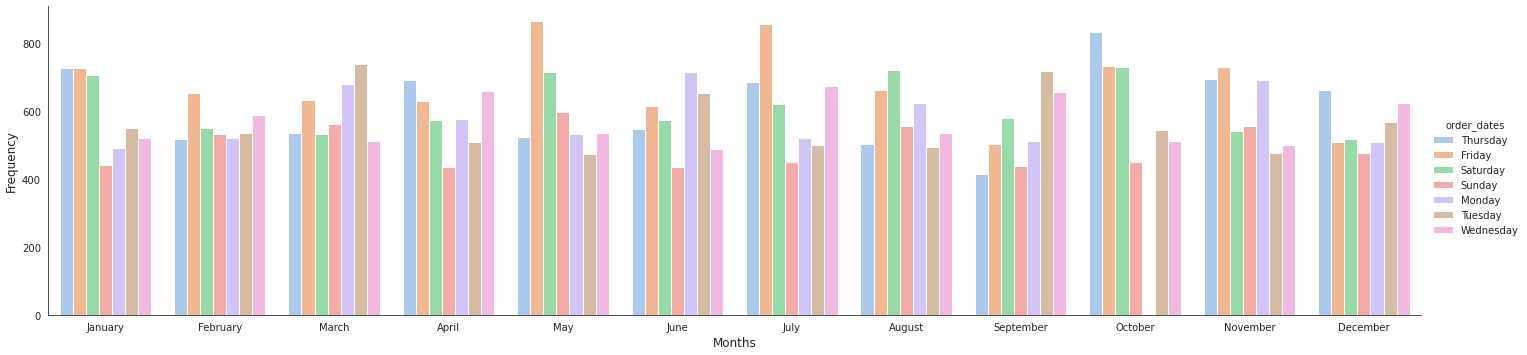

In [31]:
palette="pastel"

### Daily hour-wise sales of pizza

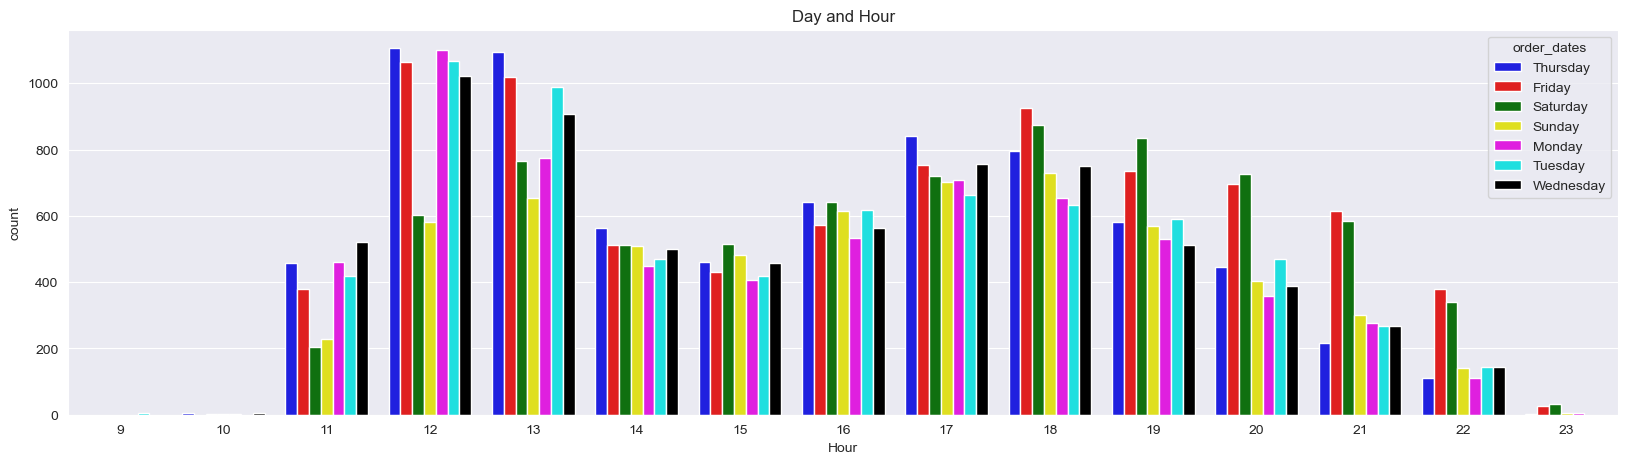

In [101]:
sns.set_style('darkgrid')
plt.figure(figsize=(20,5))
color=["blue","red","green","yellow","magenta","cyan","black","orange"]
sns.countplot(x="Hour", hue= "order_dates" , palette = color, data=df)
plt.xlabel("Hour")
plt.title("Day and Hour")
plt.legend(title='order_dates',fontsize=10, loc='upper right')
plt.show()

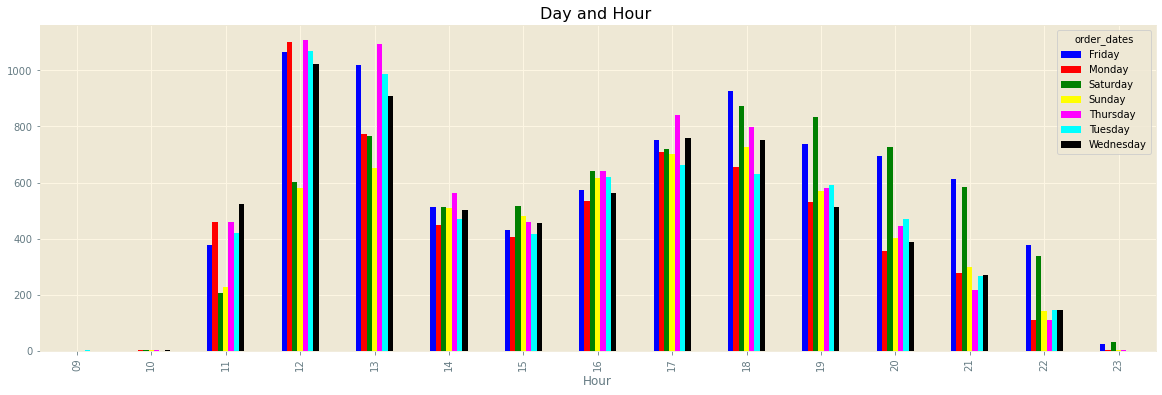

In [34]:
color=["blue","red","green","yellow","magenta","cyan","black","orange"]

### Which pizza size earns more money

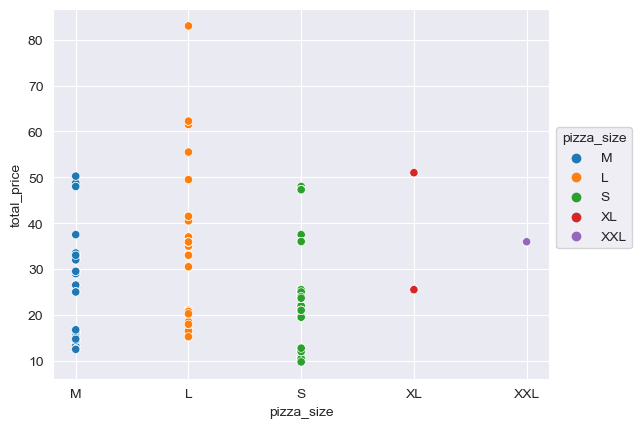

In [96]:
sns.scatterplot(x="pizza_size", y="total_price", hue="pizza_size", data=df)
plt.xlabel("pizza_size")
plt.ylabel("total_price")
plt.legend(title = 'pizza_size', fontsize=10,bbox_to_anchor=(1,0.7))
plt.show()     

### Answers of the following question

    
1. What days and times do we tend to be busiest?
2. How many pizzas are we making during peak periods?
3. What are our best and worst-selling pizzas?
4. What's our average order value?
5. How well are we utilizing our seating capacity? (we have 15 tables and 60 seats)

In [ ]:
1. Friday and 12:00 to 13:00 hour of the day is the busiest in the data.

In [ ]:
2. 

In [ ]:
3. Classic is most selling category whereas chicken is worst selling category pizza.

In [ ]:
4.

In [ ]:
5. By distributing 4 seats to every single message.